<a href="https://colab.research.google.com/github/MichaelBarfuss/Intro-to-Analytics/blob/main/IMSE441_Midterm_1_MB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint 
from scipy.stats import binom
import scipy as scipy
%pip install pingouin
import pingouin as pg


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [183]:
from scipy.stats import hypergeom
from scipy.stats import norm
from scipy import stats

**1A.**

Discrete Distribution

In [184]:
L=1
U=6

X = np.arange(L, U+1)

print(X)


[1 2 3 4 5 6]


In [185]:
#Mean #Variance 
mean, var=X.mean(),X.var()
mean, var

(3.5, 2.9166666666666665)

In [186]:
std=np.std(X)
std

1.707825127659933

Continous Distribution

In [187]:

x = np.random.randn(20)
x

array([ 0.80723653,  0.04549008, -0.23309206, -1.19830114,  0.19952407,
        0.46843912, -0.83115498,  1.16220405, -1.09720305, -2.12310035,
        1.03972709, -0.40336604, -0.12602959, -0.83751672, -1.60596276,
        1.25523737, -0.68886898,  1.66095249,  0.80730819, -0.31475815])

In [188]:
mean, var, std= np.mean(x), np.var(x), np.std(x)
mean, var, std

(-0.10066174133434291, 1.0026703967687582, 1.0013343081951993)

**B**

Discrete Dist

In [189]:
D_uni_dist = randint(L, U+1)
D_uni_pmf = D_uni_dist.pmf(X)
D_uni_pmf = D_uni_dist.pmf(X)
D_uni_dist = randint(L, U+1)

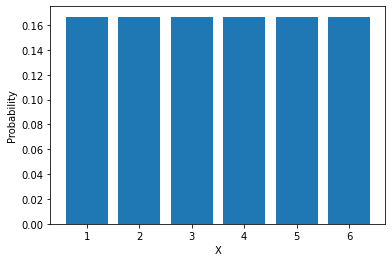

In [190]:
plt.bar(X, D_uni_pmf)
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

In [191]:
D_uni_cdf = D_uni_dist.cdf(X)

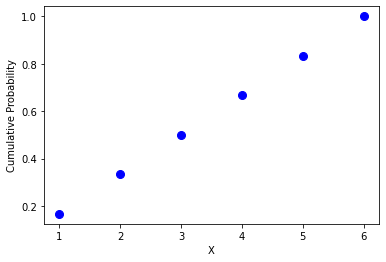

In [192]:
plt.plot(X, D_uni_cdf,'bo', ms=8)
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.show()

Continous Distribution

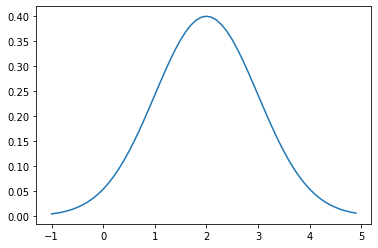

In [193]:
x=np.arange(-1,5,0.1)
plt.plot(x,norm.pdf(x,2,1))
plt.show()
     

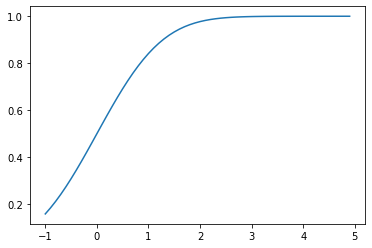

In [194]:
plt.plot(x,norm.cdf(x,0,1))
plt.show()

**C**

One of the main differences between PDF and PMF is relevent to the random variables. PDF is for continous R.V while PMF is for discrete R.V.    
PDF is the likelyhood of the R.V in the range of contious value while PMF is for dicrete R.V.

  The PMF has all the probablities the same, and the pdf has probilities that differ.

**2A**

In [195]:
#import data set
url ="https://raw.githubusercontent.com/KhmAsif/IMSE441/main/OTT_platform_data.csv"
df =pd.read_csv(url)
df.head()

,Platform,Time
0,Netflix,0.21
1,Amazon Prime,2.53
2,Netflix,0.35
3,Amazon Prime,0.71
4,Netflix,0.67


In [196]:
#Data Cleaning 
df.isnull().sum()

Platform    1
Time        2
dtype: int64

In [197]:
# Dropping nulls. 
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 22
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Platform  21 non-null     object 
 1   Time      21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes


In [198]:
df.columns

Index(['Platform', 'Time'], dtype='object')

In [199]:
df.columns = df.columns.str.replace(' ','')
df.columns

Index(['Platform', 'Time'], dtype='object')

In [200]:
#Turning all the columns capitals into lower case.
df.columns = df.columns.str.lower()
df.columns

Index(['platform', 'time'], dtype='object')

**B**

In [201]:
Netflix=(df[df['platform']=='Netflix']['time'])
Netflix

0     0.21
2     0.35
4     0.67
8     1.32
10    0.68
12    3.21
14    1.47
16    0.95
18    0.45
20    1.18
22    3.42
Name: time, dtype: float64

In [202]:
Amazon=(df[df['platform']=='Amazon Prime']['time'])
Amazon

1     2.53
3     0.71
5     0.85
7     2.46
9     1.49
13    3.33
15    1.87
17    1.26
19    0.48
21    1.47
Name: time, dtype: float64

In [203]:
df['time'].mean()

1.4457142857142857

In [204]:
Amazon.mean()

1.645

In [205]:
Netflix.mean()

1.2645454545454546

From the code below you can see that 11 people watch netflix and 10 people watch Amazon

**C**

platform
Amazon Prime    10
Netflix         11
dtype: int64

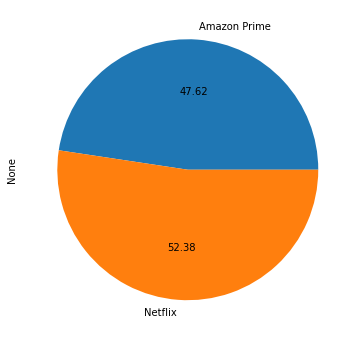

In [206]:
g.plot(kind = 'pie', autopct='%.2f', figsize = (10,6) )
g = df.groupby('platform').size()
g

Based on the graph above I can say that just about 53 percent of people like Netflix better.

**D**

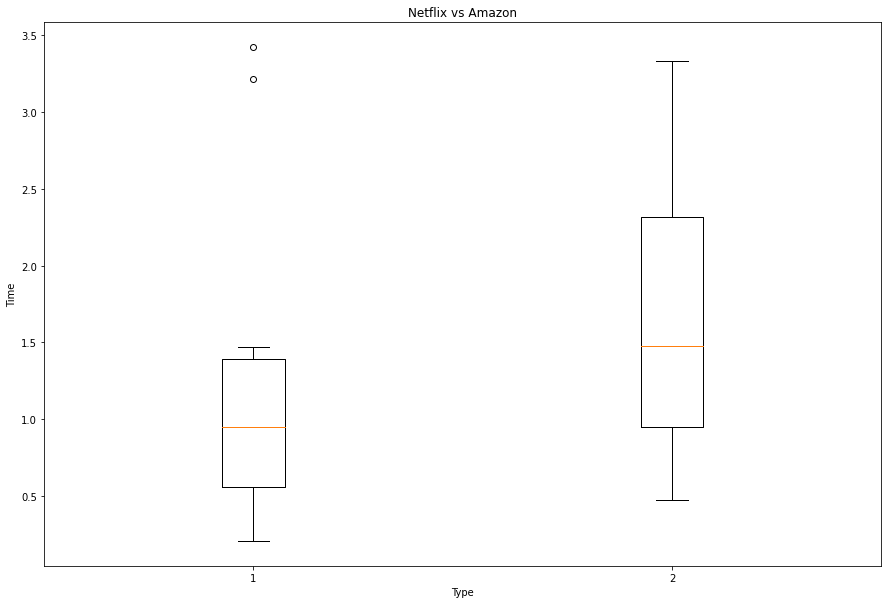

In [207]:
plt.figure(figsize=(15,10))
plt.boxplot([Netflix,Amazon])
plt.title('Netflix vs Amazon' )
plt.xlabel('Type')
plt.ylabel('Time')
plt.show()
     

Based on the case above it looks to have the median on Netflix as 1.0 and the median of amazon at 1.5

**3A**

Text(0.5, 1.0, 'Our Data')

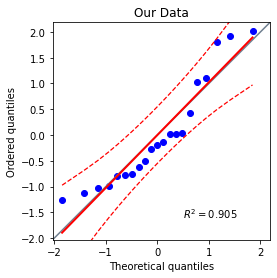

In [208]:
#Plotting to check the Normalitiy of the data.
plt.show()
pg.qqplot(df['time']).set_title('Our Data')

In [209]:
#Second Testing
# Hypothesis testing for normallity
print(stats.normaltest(df['time']))

NormaltestResult(statistic=2.9693617401687833, pvalue=0.22657463588450225)


B.

In [210]:
# The P value was high so it is normal dist
#Perform ttesting
stats.ttest_1samp(df['time'],0.83)

TtestResult(statistic=2.817958669950323, pvalue=0.010626190992228224, df=20)

In [211]:
T,P = stats.ttest_1samp(df['time'],0.83)
T, P

(2.817958669950323, 0.010626190992228224)

In [212]:
CI= stats.ttest_1samp(df['time'],0.83).confidence_interval(confidence_level=0.99)
CI

ConfidenceInterval(low=0.8240173368904734, high=2.067411234538098)

In [213]:
if P < 0.01:
  print("Reject Null Hypothesis i.e. actual mean is NOT 0.83")
else:
  print("Accept Null Hypothesis i.e. actual mean is 0.83")

Accept Null Hypothesis i.e. actual mean is 0.83


Based on a 99% CI it barley fits in the range to be apart of the mean.

**C**

It is a two sided CI

**D**

In [214]:
# The degrees of freedom
len(df)-1

20

**E**

In [215]:
 df['time'].mean()

1.4457142857142857

## It is the acutal mean for the dataset.


The Mean of 0.83 can be a sample mean.